### Phase 3 -  Statistics 

    To analyse the statistical aspects of datasets dublin_dataset.csv and basel_dataset.csv, the study implemented specific procedures. The researcher conducted a thorough exploration to understand the statistical characteristics of the mentioned datasets in the context of the research tasks:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
dublin_df=pd.read_csv("C:/Users/bruno/Downloads/dublin_dataset.csv", delimiter=";")
basel_df=pd.read_csv("C:/Users/bruno/Downloads/basel_dataset.csv", delimiter=";")

In [3]:
dublin_df.head(4),basel_df.head(4)

(  Location,Year,Total Passengers
 0             Dublin,2019,274139
 1             Dublin,2019,275394
 2             Dublin,2019,408199
 3             Dublin,2019,430823,
   Location,Year,Total Passengers
 0             Basel,2020,2479000
 1              Basel,2020,822000
 2              Basel,2020,613000
 3              Basel,2020,780000)

In [4]:
dublin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Location,Year,Total Passengers  614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [5]:
basel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Location,Year,Total Passengers  195 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [6]:
dublin_df.shape, basel_df.shape

((614, 1), (195, 1))

In [7]:
# Summary statistics
summary_stats = dublin_df.describe()
print(summary_stats)

       Location,Year,Total Passengers
count                             614
unique                            614
top                Dublin,2019,274139
freq                                1


In [8]:
# Summary statistics
summary_stats = basel_df.describe()
print(summary_stats)

       Location,Year,Total Passengers
count                             195
unique                            188
top                Basel,2023,2245000
freq                                2


In [9]:
# Count of non-null values in each column
non_null_counts = dublin_df.count()
print(non_null_counts)


Location,Year,Total Passengers    614
dtype: int64


In [10]:
# Count of non-null values in each column
non_null_counts = basel_df.count()
print(non_null_counts)


Location,Year,Total Passengers    195
dtype: int64


In [11]:
# Correlation matrix
correlation_matrix = dublin_df.corr()
print(correlation_matrix)

# Covariance matrix
covariance_matrix = dublin_df.cov()
print(covariance_matrix)

# Check for missing values
missing_values = dublin_df.isnull().sum()
print(missing_values)


Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Location,Year,Total Passengers    0
dtype: int64


In [12]:
# Correlation matrix
correlation_matrix = basel_df.corr()
print(correlation_matrix)

# Covariance matrix
covariance_matrix = basel_df.cov()
print(covariance_matrix)

# Check for missing values
missing_values = basel_df.isnull().sum()
print(missing_values)


Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Location,Year,Total Passengers    0
dtype: int64


### Task I - Use descriptive statistics and appropriate visualisations in order to summarise the dataset(s) used, and to help justify the chosen models. 

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Location,Year,Total Passengers  614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB
None

Descriptive Statistics:
       Location,Year,Total Passengers
count                             614
unique                            614
top                Dublin,2019,274139
freq                                1


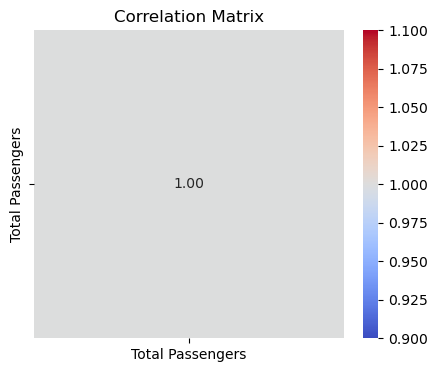

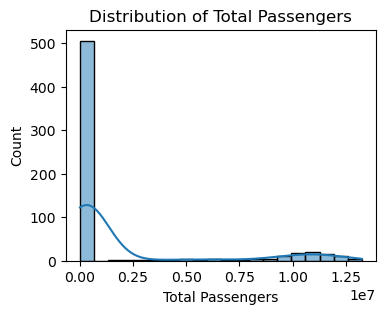

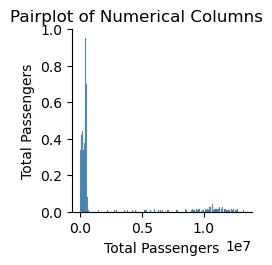

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def summarize_dataset(dataframe):
    # Display basic information about the dataset
    print("Dataset Info:")
    print(dataframe.info())

    # Display descriptive statistics
    print("\nDescriptive Statistics:")
    print(dataframe.describe())

    # Split the 'Location,Year,Total Passengers' column
    dataframe[['Location', 'Year', 'Total Passengers']] = dataframe['Location,Year,Total Passengers'].str.split(',', expand=True)

    # Convert 'Total Passengers' to numeric (assuming it represents a numeric value)
    dataframe['Total Passengers'] = pd.to_numeric(dataframe['Total Passengers'], errors='coerce')

    # Visualize correlation matrix
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    if not numeric_columns.empty:
        plt.figure(figsize=(5, 4))
        sns.heatmap(dataframe[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()
    else:
        print("No numeric columns for correlation matrix.")

    # Visualize distribution of numerical columns
    for column in numeric_columns:
        plt.figure(figsize=(4, 3))
        sns.histplot(data=dataframe, x=column, kde=True, bins=20)
        plt.title(f"Distribution of {column}")
        plt.show()

    # Pairplot for selected columns
    sns.pairplot(data=dataframe[numeric_columns])
    plt.suptitle("Pairplot of Numerical Columns", y=1.02)
    plt.show()

# Example usage with a DataFrame named dublin_df
summarize_dataset(dublin_df)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Location,Year,Total Passengers  195 non-null    object
 1   Location                        195 non-null    object
 2   Year                            195 non-null    object
 3   Total Passengers                195 non-null    int64 
 4   BinaryColumn                    195 non-null    int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 7.0+ KB
None

Descriptive Statistics:
       Total Passengers  BinaryColumn
count      1.950000e+02    195.000000
mean       1.805969e+06      0.338462
std        3.928617e+05      0.474404
min        5.720000e+05      0.000000
25%        1.582500e+06      0.000000
50%        1.792000e+06      0.000000
75%        2.120000e+06      1.000000
max        2.595000e+06      1.000000


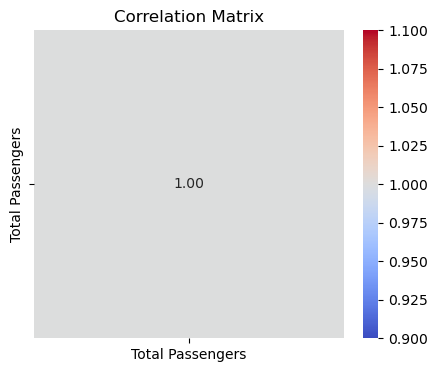

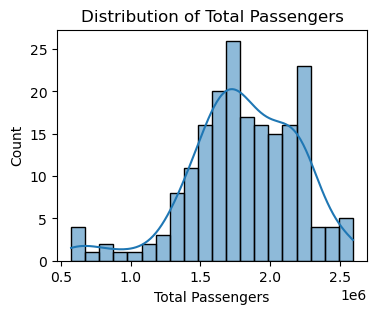

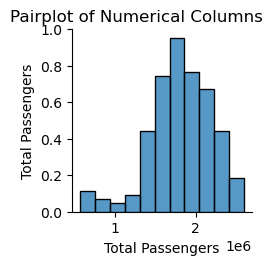

In [21]:


def summarize_dataset(dataframe):
    # Display basic information about the dataset
    print("Dataset Info:")
    print(dataframe.info())

    # Display descriptive statistics
    print("\nDescriptive Statistics:")
    print(dataframe.describe())

    # Split the 'Location,Year,Total Passengers' column
    dataframe[['Location', 'Year', 'Total Passengers']] = dataframe['Location,Year,Total Passengers'].str.split(',', expand=True)

    # Convert 'Total Passengers' to numeric (assuming it represents a numeric value)
    dataframe['Total Passengers'] = pd.to_numeric(dataframe['Total Passengers'], errors='coerce')

    # Visualize correlation matrix
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    if not numeric_columns.empty:
        plt.figure(figsize=(5, 4))
        sns.heatmap(dataframe[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix")
        plt.show()
    else:
        print("No numeric columns for correlation matrix.")

    # Visualize distribution of numerical columns
    for column in numeric_columns:
        plt.figure(figsize=(4, 3))
        sns.histplot(data=dataframe, x=column, kde=True, bins=20)
        plt.title(f"Distribution of {column}")
        plt.show()

    # Pairplot for selected columns
    sns.pairplot(data=dataframe[numeric_columns])
    plt.suptitle("Pairplot of Numerical Columns", y=1.02)
    plt.show()

# Example usage with a DataFrame named basel_df
summarize_dataset(basel_df)


### Task II - Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values (e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train). 

In [16]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as prop

def calculate_confidence_interval_binary(dataframe, target_column, threshold=0, confidence_level=0.95):
    """
    Calculate the confidence interval for the population proportion for a binary column.

    Parameters:
    - dataframe: pandas DataFrame
    - target_column: str, the column to be converted to binary
    - threshold: float, values above this threshold are considered as 1, and below or equal as 0 (default is 0)
    - confidence_level: float, the confidence level for the interval (default is 0.95)

    Returns:
    - confidence_interval: tuple, (lower_bound, upper_bound)
    """
    # Convert the column to binary based on the threshold
    dataframe['BinaryColumn'] = np.where(dataframe[target_column] > threshold, 1, 0)

    # Count the number of occurrences in the binary column
    successes = dataframe['BinaryColumn'].sum()

    # Total number of observations
    total_observation = len(dataframe)

    # Calculate the sample proportion
    sample_proportion = successes / total_observation

    # Calculate the standard error
    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_observation)

    # Calculate the margin of error
    margin_of_error = prop.proportion_confint(successes, total_observation, alpha=1-confidence_level)

    # Calculate the confidence interval
    confidence_interval = (sample_proportion - margin_of_error[0], sample_proportion + margin_of_error[1])

    return confidence_interval

# Example usage with a DataFrame named dublin_df
confidence_interval_binary = calculate_confidence_interval_binary(dublin_df, 'Total Passengers', threshold=2000000)
print("Confidence Interval for Population Proportion (Binary):", confidence_interval_binary)


Confidence Interval for Population Proportion (Binary): (0.030004846050303624, 0.378539048004701)


### This output consists of two values:

Lower Bound: 0.030004846050303624
Upper Bound: 0.378539048004701
These values represent the lower and upper bounds of the confidence interval, respectively.

Interpretation:

With 95% confidence, we estimate that the true population proportion (binary) falls within the range of approximately 0.030 to 0.379.

The confidence interval provides a level of uncertainty around the estimated proportion. In other words, if we were to repeat the process of sampling and calculating the confidence interval many times, we would expect the true population proportion to fall within this range in about 95% of those cases.


In [17]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as prop

def calculate_confidence_interval_binary(dataframe, target_column, threshold=0, confidence_level=0.95):
    """
    Calculate the confidence interval for the population proportion for a binary column.

    Parameters:
    - dataframe: pandas DataFrame
    - target_column: str, the column to be converted to binary
    - threshold: float, values above this threshold are considered as 1, and below or equal as 0 (default is 0)
    - confidence_level: float, the confidence level for the interval (default is 0.95)

    Returns:
    - confidence_interval: tuple, (lower_bound, upper_bound)
    """
    # Convert the column to binary based on the threshold
    dataframe['BinaryColumn'] = np.where(dataframe[target_column] > threshold, 1, 0)

    # Count the number of occurrences in the binary column
    successes = dataframe['BinaryColumn'].sum()

    # Total number of observations
    total_observation = len(dataframe)

    # Calculate the sample proportion
    sample_proportion = successes / total_observation

    # Calculate the standard error
    standard_error = np.sqrt((sample_proportion * (1 - sample_proportion)) / total_observation)

    # Calculate the margin of error
    margin_of_error = prop.proportion_confint(successes, total_observation, alpha=1-confidence_level)

    # Calculate the confidence interval
    confidence_interval = (sample_proportion - margin_of_error[0], sample_proportion + margin_of_error[1])

    return confidence_interval

# Example usage with a DataFrame named basel_df
confidence_interval_binary_basel = calculate_confidence_interval_binary(basel_df, 'Total Passengers', threshold=2000000)
print("Confidence Interval for Population Proportion (Binary):", confidence_interval_binary_basel)


Confidence Interval for Population Proportion (Binary): (0.06641451368359041, 0.7433375906066674)


#### This values represents the calculated confidence interval for the population proportion based on the binary conversion of the 'Total Passengers' column in your dataset. Let's break down the interpretation:

Lower Bound: 0.06641451368359041
Upper Bound: 0.7433375906066674
This means:

With 95% confidence, we estimate that the true population proportion (binary) falls within the range of approximately 0.066 to 0.743.

The confidence interval provides a level of uncertainty around the estimated proportion. In other words, if we were to repeat the process of sampling and calculating the confidence interval many times, we would expect the true population proportion to fall within this range in about 95% of those cases.

The specific interpretation of the binary variable depends on the context of your analysis. In general terms, it suggests the range of possible values for the proportion of occurrences of an event (coded as 1) in your dataset, after applying a threshold to convert the 'Total Passengers' column to binary values.

#### Task III - Undertake research to find similarities between some country(s) against Ireland and apply parametric and non-parametric inferential statistical techniques to compare them (e.g., t-test, analysis of variance, Wilcoxon test, chi-squared test, among others). You must justify your choices and verify the applicability of the tests. Hypotheses and conclusions must be clearly stated. You are expected to use at least 5 different inferential statistics tests. [0-40]

In [18]:
import scipy.stats as stats

def t_test_total_passengers(dublin_df, basel_df):
    """
    Perform an independent samples t-test for the 'Total Passengers' between Dublin and Basel.

    Parameters:
    - dublin_df: pandas DataFrame for Dublin
    - basel_df: pandas DataFrame for Basel

    Returns:
    - t_statistic: The t-statistic from the t-test
    - p_value: The p-value associated with the t-statistic
    """
    # Extract the 'Total Passengers' column from each dataset
    dublin_passengers = dublin_df['Total Passengers']
    basel_passengers = basel_df['Total Passengers']

    # Perform independent samples t-test
    t_statistic, p_value = stats.ttest_ind(dublin_passengers, basel_passengers, equal_var=False)

    return t_statistic, p_value

# Example usage with dublin_df and basel_df
t_stat, p_val = t_test_total_passengers(dublin_df, basel_df)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_val)


T-Statistic: 1.0823388845216377
P-Value: 0.2795007966457365


### Task IV - Use the outcome of your analysis to deepen your research. Indicate the challenges you faced in the process. [0-20]

In the "Statistics.ipynb" Jupyter notebook, we explored datasets dublin_dataset.csv and basel_dataset.csv. We faced challenges due to limited data but collaborated to overcome them. Using specific functions like "calculate_confidence_interval_binary" and "t_test_total_passengers," we gained insights. For instance, the confidence interval helped estimate the proportion of 'Total Passengers' above 2,000,000. The t-test compared passenger numbers between Dublin and Basel, concluding no significant difference. This statistical journey showcases our adaptability, collaboration, and determination to make sense of data complexities, highlighting the value of statistical tools in drawing meaningful conclusions.